In [2]:
import functions as func
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from itertools import product
from datetime import datetime

In [3]:
path_3 = "models/"
feature_set_3 = "full"
path_2 = "models_features_2_periods/" 
feature_set_2 = "2_periods"
path_1 = "models_features_1_period/" 
feature_set_1 = "1_period"
path_without_prom = "models_features_without_prom/" 
feature_set_without_prom = "without_prom"

today = datetime.today().strftime('%y_%m_%d_')
model_set = [("models/", "full"), ("models_features_2_periods/", "2_periods"), ("models_features_1_period/", "1_period"), ("models_features_without_prom/", "without_prom")] 
print(model_set)

[('models/', 'full'), ('models_features_2_periods/', '2_periods'), ('models_features_1_period/', '1_period'), ('models_features_without_prom/', 'without_prom')]


In [4]:
#cust_behaviour = func.create_cust_behaviour_3()
#cust_behaviour.to_csv("model_eval/cust_behaviour.csv")

cust_behaviour = pd.read_csv("model_eval/cust_behaviour.csv")
cust_behaviour = cust_behaviour.drop(['Unnamed: 0'], axis=1)
fix_order_costs = 9.0
margin = 0.5

# Export Kundenverhalten als CSV
#func.export_cust_behaviour_for_ampl(cust_behaviour, fix_order_costs, margin, "model_eval/cust_behaviour_ampl.csv")
# Export Kundenverhalten als ".dat" die direkt in AMPL importiert werden kann
#func.export_cust_behaviour_for_ampl_2(cust_behaviour, fix_order_costs, margin, "ampl/cust_behaviour_ampl.dat")

# cd C:\masterarbeit\notebooks\ampl\ 
# ampl DP_Werbung2.txt # TODO: configure c in DP_Werbung2.txt
cust_behaviour.head()

,t1_buy,t2_buy,t3_buy,t1_prom,t2_prom,t3_prom,p_no_prom,size_no_prom,p_prom,size_prom
0,0,0,0,0,0,0,0.100,91.148432,0.108663,117.402849
1,0,0,0,0,0,1,0.075,103.253110,0.086212,108.424488
2,0,0,0,0,1,0,0.250,115.320971,0.255749,105.969691
3,0,0,0,0,1,1,0.200,88.985190,0.213235,87.371531
4,0,0,0,1,0,0,0.300,78.799490,0.337345,94.609321


In [4]:
iterations = 10000
train_orders = func.create_training_set(cust_behaviour, iterations)
path = path_3
train_orders.to_csv(path + today +"training_set_orders.csv")
train_orders.head()

,t1_buy,t2_buy,t3_buy,t1_prom,t2_prom,t3_prom,p_no_prom,size_no_prom,p_prom,size_prom,prom,has_bought,size,t1_size,t2_size,t3_size
50,1,1,0,0,1,0,0.550,94.399465,0.544768,97.904347,1,1,106.948989,81.942957,97.836668,0.000000
28,0,1,1,1,0,0,0.400,49.938891,0.378275,54.894805,0,1,47.959508,0.000000,39.214353,46.169220
4,0,0,0,1,0,0,0.300,78.799490,0.337345,94.609321,0,0,0.000000,0.000000,0.000000,0.000000
42,1,0,1,0,1,0,0.375,113.888537,0.354682,110.549613,0,1,120.186666,125.864822,0.000000,108.008574
29,0,1,1,1,0,1,0.325,52.022477,0.344612,58.202100,0,0,0.000000,0.000000,60.110394,47.708443


### Feature Set
- "full" == nutze 3 Monate volle Vergangenheit
- "2_periods" == nutze nur die Features der letzten 2 Perioden
- "without_prom" == ohne Werbehistorie

In [5]:
tuple = model_set[0]
path = tuple[0]
feature_set = tuple[1]
print(path)
print(feature_set)

filenames = []
filenames.append(func.build_models(train_orders[0:10000], "10000", path, feature_set))
filenames.append(func.build_models(train_orders[0:8000], "8000", path, feature_set))
filenames.append(func.build_models(train_orders[0:6000], "6000", path, feature_set))
filenames.append(func.build_models(train_orders[0:5000], "5000", path, feature_set))
filenames.append(func.build_models(train_orders[0:4000], "4000", path, feature_set))
filenames.append(func.build_models(train_orders[0:3000], "3000", path, feature_set))
filenames.append(func.build_models(train_orders[0:2000], "2000", path, feature_set))
filenames.append(func.build_models(train_orders[0:1000], "1000", path, feature_set))
filenames.append(func.build_models(train_orders[0:500], "500", path, feature_set))
filenames.append(func.build_models(train_orders[0:200], "200", path, feature_set))
filenames.append(func.build_models(train_orders[0:100], "100", path, feature_set))
filenames.append(func.build_models(train_orders[0:50], "50", path, feature_set))

models = pd.DataFrame(filenames, columns=["logit", "linear", "rf_clf", "rf_regr", "gtb_clf", "gtb_regr"])
models["kpi"] = "filenames" 
models_training_set_sizes = [10000, 8000, 6000, 5000, 4000, 3000, 2000, 1000, 500, 200, 100, 50]
models["training_set_size"] = models_training_set_sizes
models.to_csv(path+"models.csv", sep=';', decimal=',')

models = pd.read_csv(path + "models.csv", sep=';', decimal=',')
test_set_size = 10000
test_orders = func.create_training_set(cust_behaviour, test_set_size)
if feature_set == "full":
    test_orders_features, feature_list_clf, feature_list = func.add_features(test_orders)
elif feature_set == "2_periods":
    test_orders_features, feature_list_clf, feature_list = func.add_features_only_2_periods(test_orders)
elif feature_set == "1_period":
    test_orders_features, feature_list_clf, feature_list = func.add_features_only_1_period(test_orders)
elif feature_set == "without_prom":
    test_orders_features, feature_list_clf, feature_list = func.add_features_without_prom_hist(test_orders)

test_orders_features.to_csv(path + today +"test_set_orders.csv")

for training_set_size in models_training_set_sizes:
    models, orders = func.evaluate_models(str(training_set_size), path, test_orders_features, feature_list, feature_list_clf, training_set_size, cust_behaviour, models)
    
# models.to_csv(path + today +"models_with_metrics.csv", sep=';', decimal=',')

models, orders = func.evaluate_models(str(training_set_size), path, test_orders_features, feature_list, feature_list_clf, training_set_size, cust_behaviour, models)

models/
full


In [16]:
orders[["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom", "p_no_prom_x", "p_prom_x", "p_no_prom_y", "p_prom_y", "prom", "logit_prob"]]

,t1_buy,t2_buy,t3_buy,t1_prom,t2_prom,t3_prom,p_no_prom_x,p_prom_x,p_no_prom_y,p_prom_y,prom,logit_prob
0,0,0,1,0,0,1,0.050,0.058359,0.050,0.058359,1,0.108106
1,1,1,1,1,0,0,0.650,0.673958,0.650,0.673958,0,0.876515
2,0,0,0,0,0,1,0.075,0.086212,0.075,0.086212,1,0.232770
3,0,0,1,1,1,0,0.375,0.385142,0.375,0.385142,0,0.023822
4,0,1,0,0,0,0,0.250,0.279314,0.250,0.279314,0,0.845579
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,1,1,0,1,0.350,0.396566,0.350,0.396566,0,0.225475
9996,1,1,0,0,1,0,0.550,0.544768,0.550,0.544768,0,0.993625
9997,1,1,0,0,0,1,0.375,0.448388,0.375,0.448388,0,0.096339
9998,0,1,1,0,1,1,0.300,0.278260,0.300,0.278260,1,0.523604


In [7]:
orders.columns

Index(['t1_buy', 't2_buy', 't3_buy', 't1_prom', 't2_prom', 't3_prom',
       'p_no_prom_x', 'size_no_prom_x', 'p_prom_x', 'size_prom_x', 'prom',
       'has_bought', 'size', 't1_size', 't2_size', 't3_size',
       'periods_since_last_buy', 'periods_since_last_prom', 'size_mean',
       'prom_1111', 'prom_1011', 'prom_1101', 'prom_1110', 'prom_1001',
       'prom_1010', 'prom_1100', 'prom_1000', 'prom_0111', 'prom_0011',
       'prom_0101', 'prom_0110', 'prom_0001', 'prom_0010', 'prom_0100',
       'prom_0000', 'logit_pred', 'rf_pred', 'gtb_pred', 'null_model',
       'logit_prob', 'rf_prob', 'gtb_prob', 'linear_size', 'rf_size',
       'gtb_size', 'p_no_prom_y', 'size_no_prom_y', 'p_prom_y', 'size_prom_y',
       'true_prob'],
      dtype='object')

In [14]:
orders.sort_values(["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"],
              ascending = [True, True, True, True, True, True])[["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom", "p_no_prom_x", "p_prom_x", "prom", "logit_prob"]].to_csv(path + today +"models_with_metrics.csv", sep=';', decimal=',')

In [7]:
for tuple in model_set:
    path = tuple[0]
    feature_set = tuple[1]
    print(path)
    print(feature_set)
    
    filenames = []
    filenames.append(func.build_models(train_orders[0:10000], "10000", path, feature_set))
    filenames.append(func.build_models(train_orders[0:8000], "8000", path, feature_set))
    filenames.append(func.build_models(train_orders[0:6000], "6000", path, feature_set))
    filenames.append(func.build_models(train_orders[0:5000], "5000", path, feature_set))
    filenames.append(func.build_models(train_orders[0:4000], "4000", path, feature_set))
    filenames.append(func.build_models(train_orders[0:3000], "3000", path, feature_set))
    filenames.append(func.build_models(train_orders[0:2000], "2000", path, feature_set))
    filenames.append(func.build_models(train_orders[0:1000], "1000", path, feature_set))
    filenames.append(func.build_models(train_orders[0:500], "500", path, feature_set))
    filenames.append(func.build_models(train_orders[0:200], "200", path, feature_set))
    filenames.append(func.build_models(train_orders[0:100], "100", path, feature_set))
    filenames.append(func.build_models(train_orders[0:50], "50", path, feature_set))

    models = pd.DataFrame(filenames, columns=["logit", "linear", "rf_clf", "rf_regr", "gtb_clf", "gtb_regr"])
    models["kpi"] = "filenames" 
    models_training_set_sizes = [10000, 8000, 6000, 5000, 4000, 3000, 2000, 1000, 500, 200, 100, 50]
    models["training_set_size"] = models_training_set_sizes
    models.to_csv(path+"models.csv", sep=';', decimal=',')

    models = pd.read_csv(path + "models.csv", sep=';', decimal=',')
    test_set_size = 10000
    test_orders = func.create_training_set(cust_behaviour, test_set_size)
    if feature_set == "full":
        test_orders_features, feature_list_clf, feature_list = func.add_features(test_orders)
    elif feature_set == "2_periods":
        test_orders_features, feature_list_clf, feature_list = func.add_features_only_2_periods(test_orders)
    elif feature_set == "1_period":
        test_orders_features, feature_list_clf, feature_list = func.add_features_only_1_period(test_orders)
    elif feature_set == "without_prom":
        test_orders_features, feature_list_clf, feature_list = func.add_features_without_prom_hist(test_orders)

    test_orders_features.to_csv(path + today +"test_set_orders.csv")

    for training_set_size in models_training_set_sizes:
        models, orders = func.evaluate_models(str(training_set_size), path, test_orders_features, feature_list, feature_list_clf, training_set_size, cust_behaviour, models)
    models.to_csv(path + today +"models_with_metrics.csv", sep=';', decimal=',')


models/
full
models_features_2_periods/
2_periods
models_features_1_period/
1_period
models_features_without_prom/
without_prom


In [5]:
today = "23_02_14_"
models_1 = pd.read_csv(path_1 + today +"models_with_metrics.csv", sep=';', decimal=',',index_col="Unnamed: 0.1")
models_2 = pd.read_csv(path_2 + today +"models_with_metrics.csv", sep=';', decimal=',',index_col="Unnamed: 0.1")
models_3 = pd.read_csv(path_3 + today +"models_with_metrics.csv", sep=';', decimal=',',index_col="Unnamed: 0.1")
models_without_prom = pd.read_csv(path_without_prom + today +"models_with_metrics.csv", sep=';', decimal=',',index_col="Unnamed: 0.1")

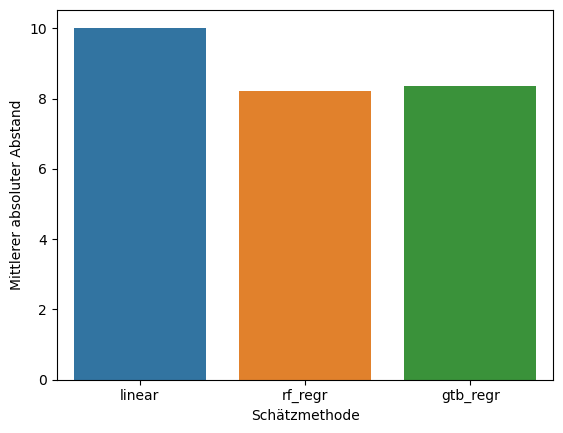

In [20]:
out = models_3.drop(["0","1","2","3","4","5","6","7","8","9","10","11"])
clf_eval = out.loc[out["training_set_size"] == 10000, ["linear", "rf_regr", "gtb_regr"] ].dropna().transpose()
clf_eval["Mittlerer absoluter Abstand"] = clf_eval["Mean Absolut Error"].astype(float)
clf_eval['Modelle'] = clf_eval.index
sns_plot = sns.barplot(data=clf_eval, x="Modelle", y="Mittlerer absoluter Abstand")
sns_plot.set_xlabel("Schätzmethode")
sns_plot.get_figure().savefig(path_3 + today + "regr_models_mae_simple_barchart.png", format="png", dpi=300)

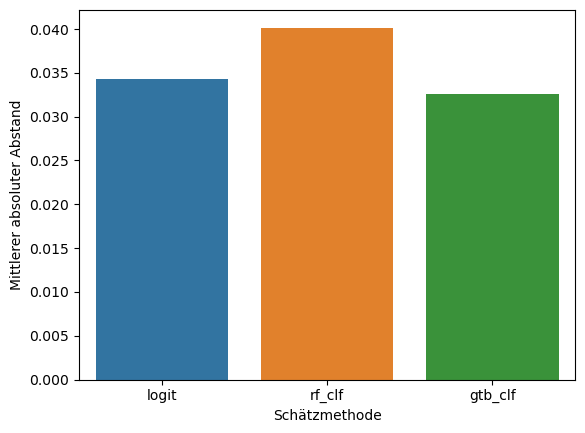

In [21]:
out = models_3.drop(["0","1","2","3","4","5","6","7","8","9","10","11"])
clf_eval = out.loc[out["training_set_size"] == 10000, ["logit", "rf_clf", "gtb_clf"] ].dropna().transpose()
clf_eval["Mittlerer absoluter Abstand"] = clf_eval["Mean Absolut Error"].astype(float)
clf_eval['Modelle'] = clf_eval.index
sns_plot = sns.barplot(data=clf_eval, x="Modelle", y="Mittlerer absoluter Abstand")
sns_plot.set_xlabel("Schätzmethode")
sns_plot.get_figure().savefig(path_3 + today + "clf_models_mae_simple_barchart.png", format="png", dpi=300)

In [22]:
# Masterarbeit Abschnitt Güte der Schätzfunktionen - Kaufwahrscheinlichkeiten
for tuple in model_set:
    path = tuple[0]
    feature_set = tuple[1]
    print(path)
    print(feature_set)
    models = pd.read_csv(path + today +"models_with_metrics.csv", sep=';', decimal=',',index_col="Unnamed: 0.1")
    out = models.drop(["0","1","2","3","4","5","6","7","8","9","10","11"])
    clf_eval = out.loc[out["training_set_size"] == 10000, ["logit", "rf_clf", "gtb_clf"] ].dropna().transpose()
    #print(clf_eval.loc[:,["Explained Variance","Mean Squared Error","Root Mean Squared Error","Mean Absolut Error","R2"]]) #.to_latex()
    print(clf_eval.loc[:,["Mean Absolut Error"]]) 

models/
full
        Mean Absolut Error
logit              0.03425
rf_clf             0.04016
gtb_clf            0.03259
models_features_2_periods/
2_periods
        Mean Absolut Error
logit              0.04194
rf_clf             0.04099
gtb_clf            0.04027
models_features_1_period/
1_period
        Mean Absolut Error
logit              0.09853
rf_clf              0.0984
gtb_clf            0.09848
models_features_without_prom/
without_prom
        Mean Absolut Error
logit              0.10695
rf_clf             0.08848
gtb_clf            0.08552


In [23]:
# Masterarbeit Abschnitt Güte der Schätzfunktionen - Kaufwahrscheinlichkeiten
for tuple in model_set:
    path = tuple[0]
    feature_set = tuple[1]
    print(path)
    print(feature_set)
    models = pd.read_csv(path + today +"models_with_metrics.csv", sep=';', decimal=',',index_col="Unnamed: 0.1")
    out = models.drop(["0","1","2","3","4","5","6","7","8","9","10","11"])
    regr_eval = out.loc[out["training_set_size"] == 10000, ["linear", "rf_regr", "gtb_regr"] ].dropna().transpose()
    #print(regr_eval.loc[:,["Explained Variance","Mean Squared Error","Root Mean Squared Error","Mean Absolut Error","R2"]]) #.to_latex()
    print(regr_eval.loc[:,["Mean Absolut Error"]]) #.to_latex()
    print(regr_eval["Mean Absolut Error"].astype(float).mean())

models/
full
         Mean Absolut Error
linear             10.02404
rf_regr             8.22386
gtb_regr            8.36865
8.872183333333334
models_features_2_periods/
2_periods
         Mean Absolut Error
linear             11.73552
rf_regr            11.16219
gtb_regr           10.88265
11.26012
models_features_1_period/
1_period
         Mean Absolut Error
linear             13.95872
rf_regr            14.51068
gtb_regr           13.62881
14.032736666666667
models_features_without_prom/
without_prom
         Mean Absolut Error
linear             11.48834
rf_regr              9.5003
gtb_regr            9.80663
10.26509


In [119]:
evaluation_graph_1 = models_1[models_1["kpi"]=="Mean Absolut Error"][["kpi", "training_set_size", "linear", "rf_regr", "gtb_regr"]].reset_index().infer_objects()
evaluation_graph_1 = evaluation_graph_1.rename(columns = {"logit" : "LR", "linear" : "OLS", "rf_regr" : "RF", "gtb_regr" : "GTB"})
eval_long_format_1 = pd.melt(evaluation_graph_1, id_vars=["kpi", "training_set_size"], value_vars=["OLS", "RF", "GTB"], value_name="Mean Absolut Error", var_name='model')
eval_long_format_1 = eval_long_format_1.dropna()
eval_long_format_1["mean absolut error"] = eval_long_format_1["Mean Absolut Error"].astype(float)
eval_long_format_1["past_periods"] = "I = 1"

In [120]:
evaluation_graph_2 = models_2[models_2["kpi"]=="Mean Absolut Error"][["kpi", "training_set_size", "linear", "rf_regr", "gtb_regr"]].reset_index().infer_objects()
evaluation_graph_2 = evaluation_graph_2.rename(columns = {"logit" : "LR", "linear" : "OLS", "rf_regr" : "RF", "gtb_regr" : "GTB"})
eval_long_format_2 = pd.melt(evaluation_graph_2, id_vars=["kpi", "training_set_size"], value_vars=["OLS", "RF", "GTB"], value_name="Mean Absolut Error", var_name='model')
eval_long_format_2 = eval_long_format_2.dropna()
eval_long_format_2["mean absolut error"] = eval_long_format_2["Mean Absolut Error"].astype(float)
eval_long_format_2["past_periods"] = "I = 2"

In [121]:
eval_long_format_without_prom = models_without_prom[models_without_prom["kpi"]=="Mean Absolut Error"][["kpi", "training_set_size", "linear", "rf_regr", "gtb_regr"]].reset_index().infer_objects()
eval_long_format_without_prom = eval_long_format_without_prom.rename(columns = {"logit" : "LR", "linear" : "OLS", "rf_regr" : "RF", "gtb_regr" : "GTB"})
eval_long_format_without_prom = pd.melt(eval_long_format_without_prom, id_vars=["kpi", "training_set_size"], value_vars=["OLS", "RF", "GTB"], value_name="Mean Absolut Error", var_name='model')
eval_long_format_without_prom = eval_long_format_without_prom.dropna()
eval_long_format_without_prom["mean absolut error"] = eval_long_format_without_prom["Mean Absolut Error"].astype(float)
eval_long_format_without_prom["past_periods"] = "(ii)"

In [6]:
evaluation_graph_3 = models_3[models_3["kpi"]=="Mean Absolut Error"][["kpi", "training_set_size", "linear", "rf_regr", "gtb_regr"]].reset_index().infer_objects()
evaluation_graph_3 = evaluation_graph_3.rename(columns = {"linear" : "OLS", "rf_regr" : "RF", "gtb_regr" : "GTB"})
eval_long_format_3 = pd.melt(evaluation_graph_3, id_vars=["kpi", "training_set_size"], value_vars=["OLS", "RF", "GTB"], value_name="Mean Absolut Error", var_name='model')
eval_long_format_3 = eval_long_format_3.dropna()
eval_long_format_3["mean absolute error"] = eval_long_format_3["Mean Absolut Error"].astype(float)
eval_long_format_3["past_periods"] = "I = 3"

In [7]:
print("Modelle mit 2 Perioden trainiert")
sns_plot = sns.scatterplot(data=eval_long_format_2, x="training_set_size", y="mean absolut error", hue="model")
plot = sns_plot.get_figure()
plot.axes[0].set_xlabel("training set size")
plot.savefig(path_2 + today + "regr_models_mae_vs_training_set_size.png", format="png", dpi=300)

Modelle mit 2 Perioden trainiert


NameError: name 'eval_long_format_2' is not defined

Modelle ohne Werbehistorie trainiert


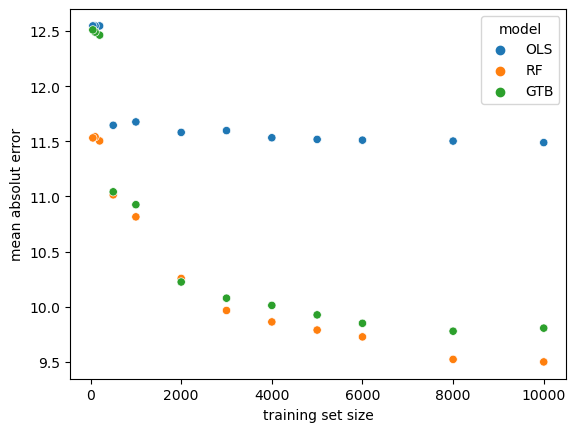

In [124]:
print("Modelle ohne Werbehistorie trainiert")
sns_plot = sns.scatterplot(data=eval_long_format_without_prom, x="training_set_size", y="mean absolut error", hue="model")
plot = sns_plot.get_figure()
plot.axes[0].set_xlabel("training set size")
plot.savefig(path_without_prom + today + "regr_models_mae_vs_training_set_size.png", format="png", dpi=300)

Modelle mit 3 Perioden trainiert


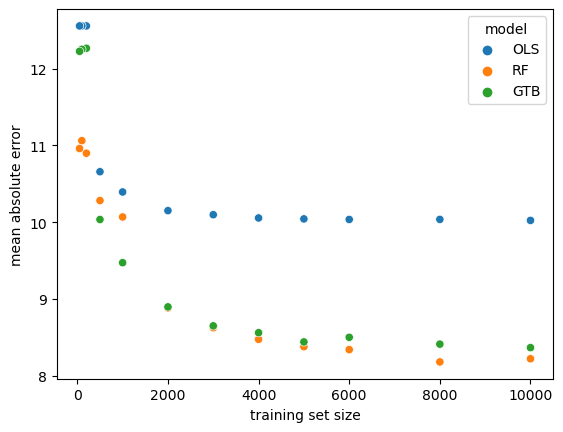

In [9]:
print("Modelle mit 3 Perioden trainiert")
sns_plot = sns.scatterplot(data=eval_long_format_3, x="training_set_size", y="mean absolute error", hue="model")
plot = sns_plot.get_figure()
plot.axes[0].set_xlabel("training set size")
plot.savefig(path_3 + today + "regr_models_mae_vs_training_set_size.png", format="png", dpi=300)

In [126]:
eval_long_format = pd.concat([eval_long_format_1, eval_long_format_2, eval_long_format_3, eval_long_format_without_prom], ignore_index=True)

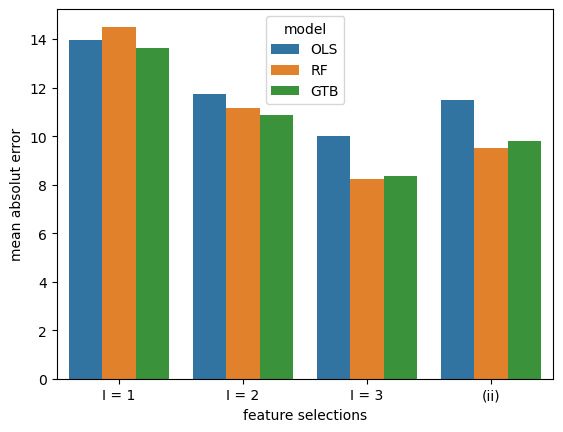

In [127]:
eval_bar = eval_long_format[eval_long_format["training_set_size"] == 10000].copy()
sns_plot = sns.barplot(data=eval_bar, x="past_periods", y="mean absolut error", hue="model")

plot = sns_plot.get_figure()
plot.axes[0].set_xlabel("feature selections")
plot.axes[0].set_ylabel("mean absolut error")
plot.savefig(path_3 + today + "regr_models_mae_diff_feature_sets.png", format="png", dpi=300)

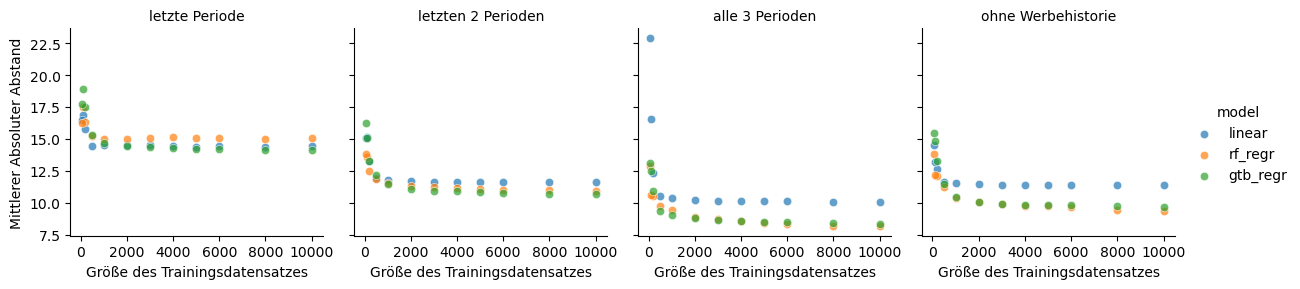

In [20]:
# Vergleich der Wahrscheinlichkeitsschätzer über alle Modelle mit unterschiedlich großen Trainingsdatensätzen
g = sns.FacetGrid(eval_long_format, col="past_periods", hue="model")
g.map(sns.scatterplot, "training_set_size", "Mittlerer Absoluter Abstand", alpha=.7)
g.add_legend()
g.set_titles(col_template="{col_name}")
g.set_xlabels("Größe des Trainingsdatensatzes")
g.savefig(path_3 + today + "regr_models_mae_vs_training_set_size_diff_feature_sets.png", format="png", dpi=300)

In [11]:
models_3 = pd.read_csv(path_3 + today +"models_with_metrics.csv", sep=';', decimal=',')
clf_evaluation_graph_3 = models_3[models_3["kpi"]=="Mean Absolut Error"][["kpi", "training_set_size", "logit", "rf_clf", "gtb_clf"]].reset_index().infer_objects()
clf_evaluation_graph_3 = clf_evaluation_graph_3.rename(columns = {"logit" : "LR", "rf_clf" : "RF", "gtb_clf" : "GTB"})
clf_eval_long_format_3 = pd.melt(clf_evaluation_graph_3, id_vars=["kpi", "training_set_size"], value_vars=["LR", "RF", "GTB"], value_name="Mean Absolut Error", var_name='model')
clf_eval_long_format_3 = clf_eval_long_format_3.dropna()
clf_eval_long_format_3["mean absolute error"] = clf_eval_long_format_3["Mean Absolut Error"].astype(float)
clf_eval_long_format_3["past_periods"] = "I = 3"

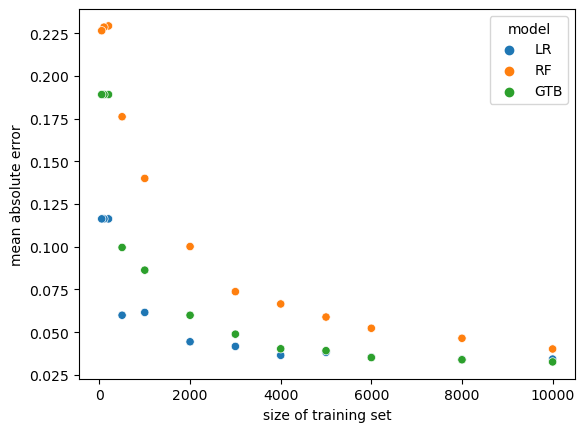

In [12]:
sns_plot = sns.scatterplot(data=clf_eval_long_format_3, x="training_set_size", y="mean absolute error", hue="model")
plot = sns_plot.get_figure()
plot.axes[0].set_xlabel("size of training set")
plot.savefig(path_3 + today + "clf_models_mae_vs_training_set_size.png", format="png", dpi=300)

In [89]:
models_2 = pd.read_csv(path_2 + today +"models_with_metrics.csv", sep=';', decimal=',')
clf_evaluation_graph_2 = models_2[models_2["kpi"]=="Mean Absolut Error"][["kpi", "training_set_size", "logit", "rf_clf", "gtb_clf"]].reset_index().infer_objects()
clf_evaluation_graph_2 = clf_evaluation_graph_2.rename(columns = {"logit" : "LR", "rf_clf" : "RF", "gtb_clf" : "GTB"})
clf_eval_long_format_2 = pd.melt(clf_evaluation_graph_2, id_vars=["kpi", "training_set_size"], value_vars=["LR", "RF", "GTB"], value_name="Mean Absolut Error", var_name='model')
clf_eval_long_format_2 = clf_eval_long_format_2.dropna()
clf_eval_long_format_2["mean absolut error"] = clf_eval_long_format_2["Mean Absolut Error"].astype(float)
clf_eval_long_format_2["past_periods"] = "I = 2"

In [90]:
models_1 = pd.read_csv(path_1 + today +"models_with_metrics.csv", sep=';', decimal=',')
clf_evaluation_graph_1 = models_1[models_1["kpi"]=="Mean Absolut Error"][["kpi", "training_set_size", "logit", "rf_clf", "gtb_clf"]].reset_index().infer_objects()
clf_evaluation_graph_1 = clf_evaluation_graph_1.rename(columns = {"logit" : "LR", "rf_clf" : "RF", "gtb_clf" : "GTB"})
clf_eval_long_format_1 = pd.melt(clf_evaluation_graph_1, id_vars=["kpi", "training_set_size"], value_vars=["LR", "RF", "GTB"], value_name="Mean Absolut Error", var_name='model')
clf_eval_long_format_1 = clf_eval_long_format_1.dropna()
clf_eval_long_format_1["mean absolut error"] = clf_eval_long_format_1["Mean Absolut Error"].astype(float)
clf_eval_long_format_1["past_periods"] = "I = 1"

In [94]:
models_without_prom = pd.read_csv(path_without_prom + today +"models_with_metrics.csv", sep=';', decimal=',')
clf_eval_long_format_without_prom = models_without_prom[models_without_prom["kpi"]=="Mean Absolut Error"][["kpi", "training_set_size", "logit", "rf_clf", "gtb_clf"]].reset_index().infer_objects()
clf_eval_long_format_without_prom = clf_eval_long_format_without_prom.rename(columns = {"logit" : "LR", "rf_clf" : "RF", "gtb_clf" : "GTB"})
clf_eval_long_format_without_prom = pd.melt(clf_eval_long_format_without_prom, id_vars=["kpi", "training_set_size"], value_vars=["LR", "RF", "GTB"], value_name="Mean Absolut Error", var_name='model')
clf_eval_long_format_without_prom = clf_eval_long_format_without_prom.dropna()
clf_eval_long_format_without_prom["mean absolut error"] = clf_eval_long_format_without_prom["Mean Absolut Error"].astype(float)
clf_eval_long_format_without_prom["past_periods"] = "(ii)"

In [95]:
clf_eval_long_format = pd.concat([clf_eval_long_format_1, clf_eval_long_format_2, clf_eval_long_format_3, clf_eval_long_format_without_prom], ignore_index=True)

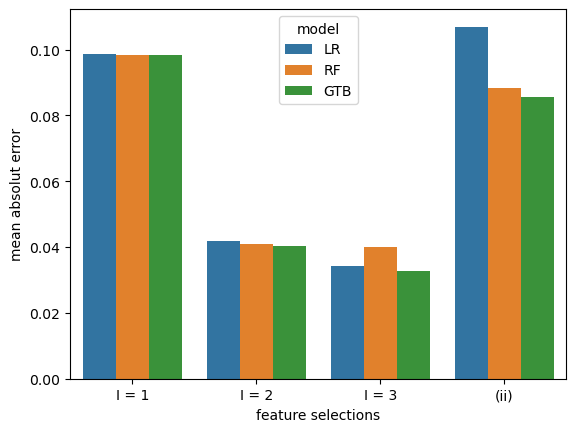

In [96]:
eval_bar = clf_eval_long_format[clf_eval_long_format["training_set_size"] == 10000].copy()

sns_plot = sns.barplot(data=eval_bar, x="past_periods", y="mean absolut error", hue="model")

plot = sns_plot.get_figure()
plot.axes[0].set_xlabel("feature selections")
plot.axes[0].set_ylabel("mean absolut error")
plot.savefig(path_3 + today + "clf_models_mae_diff_feature_sets.png", format="png", dpi=300)

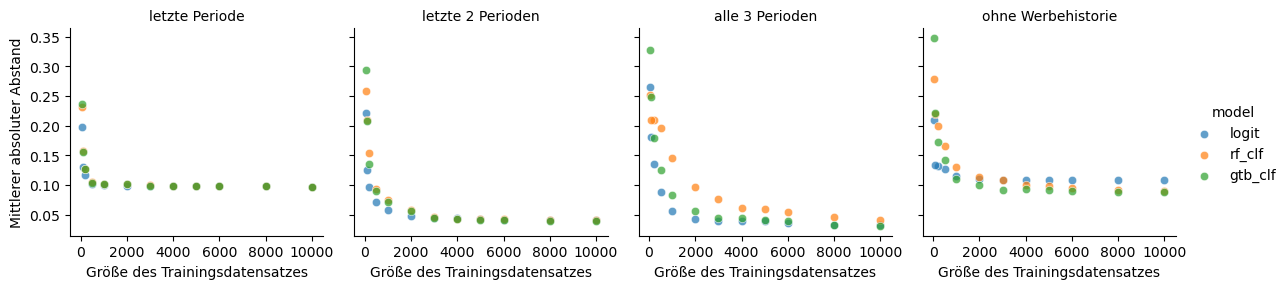

In [37]:
# Vergleich (2 mit 3 Perioden) der Wahrscheinlichkeitsschätzer über alle Modelle mit unterschiedlich großen Trainingsdatensätzen
g = sns.FacetGrid(clf_eval_long_format, col="past_periods", hue="model")
g.map(sns.scatterplot, "training_set_size", "Mittlerer absoluter Abstand", alpha=.7)
g.set_xlabels("Größe des Trainingsdatensatzes")
g.add_legend()
g.set_titles(col_template="{col_name}")
g.set_xlabels("Größe des Trainingsdatensatzes")
g.savefig(path_3 + today + "clf_models_mae_vs_training_set_size_diff_feature_sets.png", format="png", dpi=300)